In [1]:
#REFERENCE

#PCA
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html


#CLUSTERING


In [18]:
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import math

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster
from sklearn.decomposition import PCA




In [3]:
##LOADING CLEANED DATA

cleaned_team_2018 = pd.read_csv('teams_cleaned.csv')
cleaned_team_2018

Unnamed: 0                     Team     MP   3PA    3P%   2PA    2P%  \
0            0   Golden State Warriors*  19730  28.9  0.391  56.3  0.560   
1            1         Houston Rockets*  19755  43.2  0.362  42.8  0.558   
2            2    New Orleans Pelicans*  19955  27.7  0.362  59.0  0.540   
3            3         Toronto Raptors*  19830  33.6  0.358  55.5  0.541   
4            4     Cleveland Cavaliers*  19730  32.7  0.372  53.6  0.540   
5            5           Denver Nuggets  19880  31.6  0.371  56.9  0.525   
6            6      Philadelphia 76ers*  19780  29.7  0.369  56.6  0.526   
7            7  Minnesota Timberwolves*  19805  23.3  0.357  65.9  0.519   
8            8     Los Angeles Clippers  19705  27.1  0.354  59.3  0.525   
9            9        Charlotte Hornets  19780  27.5  0.369  60.1  0.487   
10          10       Los Angeles Lakers  19905  28.6  0.345  58.4  0.517   
11          11   Oklahoma City Thunder*  19830  31.2  0.354  59.2  0.505   
12          12      Washington Wizards*  19855  27.2  0.375  60.6  0.508   
13          13            Brooklyn Nets  19855  35.7  0.356  51.2  0.500   
14          14         Milwaukee Bucks*  19830  25.5  0.355  60.1  0.531   
15          15  Portland Trail Blazers*  19755  29.1  0.366  60.7  0.493   
16          16          Indiana Pacers*  19755  25.4  0.369  64.2  0.513   
17          17          New York Knicks  19830  23.9  0.352  66.0  0.504   
18          18               Utah Jazz*  19755  30.8  0.366  55.5  0.515   
19          19          Boston Celtics*  19805  31.4  0.377  56.6  0.491   
20          20             Phoenix Suns  19705  27.8  0.334  59.0  0.492   
21          21          Detroit Pistons  19805  29.9  0.373  59.9  0.488   
22          22              Miami Heat*  19930  31.6  0.360  56.6  0.508   
23          23            Orlando Magic  19730  29.8  0.351  57.5  0.504   
24          24            Atlanta Hawks  19705  31.5  0.360  55.4  0.495   
25          25            Chicago Bulls  19855  31.3  0.355  58.2  0.478   
26          26       San Antonio Spurs*  19730  25.3  0.352  64.3  0.499   
27          27         Dallas Mavericks  19805  34.1  0.360  55.2  0.496   
28          28        Memphis Grizzlies  19705  27.6  0.352  59.5  0.486   
29          29         Sacramento Kings  19755  25.2  0.375  65.2  0.479   

     FTA    FT%   ORB   DRB   AST  STL  BLK   TOV    PF    PTS  \
0   20.4  0.815   8.4  35.1  29.3  8.0  7.5  15.5  19.6  113.6   
1   25.7  0.781   9.2  35.2  22.0  8.7  4.9  14.1  19.9  114.7   
2   20.5  0.772   8.5  35.0  26.3  7.9  5.8  14.6  18.8  109.6   
3   22.2  0.794   9.9  34.9  24.8  7.8  6.2  13.6  22.2  113.8   
4   23.7  0.779   8.6  34.3  23.8  7.2  3.9  14.0  18.9  112.9   
5   22.8  0.767  11.2  34.3  25.7  7.8  5.0  15.3  19.1  112.5   
6   22.7  0.752  10.9  36.4  27.0  8.3  5.1  16.4  22.0  109.5   
7   25.0  0.804  10.7  32.7  23.5  8.7  4.4  12.9  18.9  113.4   
8   25.8  0.743  10.3  34.1  22.6  7.7  4.6  14.9  20.2  110.3   
9   27.3  0.747  10.2  35.8  21.8  6.9  4.6  12.8  17.4  109.4   
10  23.0  0.714  10.5  35.2  23.4  7.6  4.7  15.6  20.9  106.5   
11  24.8  0.716  12.8  33.4  21.9  9.3  5.2  14.4  20.7  110.7   
12  22.3  0.772  10.3  33.9  25.8  8.1  4.4  15.0  21.8  109.3   
13  22.6  0.772   9.7  34.9  23.7  6.3  4.8  15.2  20.6  106.9   
14  24.1  0.783   8.7  32.4  24.0  9.1  5.6  14.3  22.0  109.8   
15  21.6  0.800  10.5  36.4  20.1  7.2  5.3  14.0  20.1  109.1   
16  19.9  0.779  10.0  34.0  23.0  9.1  4.3  13.8  19.5  109.5   
17  19.5  0.787  10.7  34.4  23.9  6.9  5.3  15.1  21.0  107.1   
18  22.4  0.779   9.4  35.6  23.3  9.0  5.3  15.3  20.4  108.4   
19  21.4  0.771   9.7  36.3  23.2  7.6  4.7  14.5  20.4  107.6   
20  23.8  0.741  10.2  33.7  21.2  6.9  4.5  15.7  21.9  103.5   
21  20.4  0.745  10.5  34.7  23.5  7.9  4.0  13.9  19.0  107.2   
22  20.2  0.755   9.6  35.3  23.5  7.8  5.5  14.9  20.8  106.8   
23  20.8  0.757   9.0  33.4  23.8  7.7  5.0  14.8  19.6  105.2 

In [4]:
#FEATURE SELECTION

#REMOVING MOV - corr w W
#REMOVING ORB, DRB, opp ORB, opp DRB, reduntant with ORB% and DRB%
#REMOVING TS% - reflected in shooting stats
#REMOVING PTS and opp PTS - reflected in ORtg and DRtg
#REMOVING ORTG - strongly correlated w Wins

## Selecting Specific Columns
cleaned_selected = cleaned_team_2018[['Team' ,'FTA', 'FT%','AST', 'STL', 'BLK', 'TOV', 'PF', 
                                      'opp_FTA', 'opp_FT%','opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF',
                                      'Dist.','Pct_FGA_by_dist_0-3','Pct_FGA_by_dist_3-10','Pct_FGA_by_dist_10-16','Pct_FGA_by_dist_16-3pt','Pct_FGA_by_dist_3P','FGP_by_dist_2P','FGP_by_dist_3P','3FG_%assisted','3FG_corner_%3PA',
                                      'opp_Dist.','opp_Pct_FGA_by_dist_0-3','opp_Pct_FGA_by_dist_3-10','opp_Pct_FGA_by_dist_10-16','opp_Pct_FGA_by_dist_16-3pt','opp_Pct_FGA_by_dist_3P','opp_FGP_by_dist_2P','opp_FGP_by_dist_3P','opp_3FG_%assisted','opp_3FG_corner_%3PA',
                                      'Age','DRtg', 'Pace', 'ORB%', 'DRB%']]


In [6]:
#STANDARDIZING FEATURES
## of non-text columns (excludes Team column)
x_standardized  = pd.DataFrame(StandardScaler().fit_transform(cleaned_selected.select_dtypes(exclude='object')),  
                               columns=['FTA', 'FT%','AST', 'STL', 'BLK', 'TOV', 'PF', 
                                      'opp_FTA', 'opp_FT%','opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF',
                                      'Dist.','Pct_FGA_by_dist_0-3','Pct_FGA_by_dist_3-10','Pct_FGA_by_dist_10-16','Pct_FGA_by_dist_16-3pt','Pct_FGA_by_dist_3P','FGP_by_dist_2P','FGP_by_dist_3P','3FG_%assisted','3FG_corner_%3PA','3FG_corner_3P%',
                                      'opp_Dist.','opp_Pct_FGA_by_dist_0-3','opp_Pct_FGA_by_dist_3-10','opp_Pct_FGA_by_dist_10-16','opp_Pct_FGA_by_dist_16-3pt','Pct_FGA_by_dist_3P','opp_FGP_by_dist_2P','opp_FGP_by_dist_3P','opp_3FG_%assisted','opp_3FG_corner_%3PA','opp_3FG_corner_3P%',
                                      'Age','ORtg','DRtg', 'Pace',  'ORB%', 'DRB%'])

#Adds Team column back
x_standardized['Team'] = cleaned_selected['Team']

In [60]:
##GENERATE PRINCIPAL COMPONENTS

#FINDING VARIANCE REPRESENTED BY PC 
pca = PCA()
principalComponents = pca.fit_transform(x_standardized.select_dtypes(exclude='object'))
principalDf = pd.DataFrame(data = principalComponents)

np.set_printoptions(precision=2, suppress=True)
print('Total Variance: ' + str(sum(pca.explained_variance_)))
print('Percentage of Var represented by PC: ')
print(pca.explained_variance_/sum(pca.explained_variance_))
print('Cumulative Percentage of Var represented by PC: ')
print(np.cumsum(pca.explained_variance_/sum(pca.explained_variance_)))




Total Variance: 43.448275862068996
Percentage of Var represented by PC: 
[0.17 0.13 0.12 0.11 0.07 0.06 0.05 0.05 0.04 0.04 0.03 0.02 0.02 0.02
 0.02 0.01 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]
Cumulative Percentage of Var represented by PC: 
[0.17 0.29 0.41 0.52 0.59 0.65 0.71 0.75 0.79 0.82 0.85 0.87 0.9  0.92
 0.93 0.95 0.96 0.97 0.98 0.98 0.99 0.99 0.99 1.   1.   1.   1.   1.
 1.   1.  ]


For n_clusters = 2 The average silhouette_score is : 0.3549309022391659
For n_clusters = 3 The average silhouette_score is : 0.42445150157282185
For n_clusters = 4 The average silhouette_score is : 0.3845410568933623
For n_clusters = 5 The average silhouette_score is : 0.44397553709802
For n_clusters = 6 The average silhouette_score is : 0.4342196628554402
For n_clusters = 7 The average silhouette_score is : 0.42582879847253985
For n_clusters = 8 The average silhouette_score is : 0.4367318209568756
For n_clusters = 9 The average silhouette_score is : 0.47226665622199593


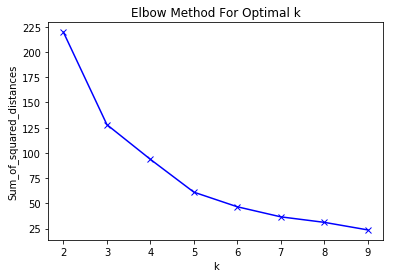

In [83]:
## Number of Cluster Analysis PCA = 2

#DECIDED ON # of Components = 2 to represent 29% of variance
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x_standardized.select_dtypes(exclude='object'))
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', ])#'principal component 3'])#, 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])


Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(principalDf)
    Sum_of_squared_distances.append(km.inertia_)
    cluster_labels = km.labels_
    silhouette_avg = silhouette_score(principalDf, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.2759298846241001
For n_clusters = 3 The average silhouette_score is : 0.30967905938715046
For n_clusters = 4 The average silhouette_score is : 0.33102644636635586
For n_clusters = 5 The average silhouette_score is : 0.3439399579716747
For n_clusters = 6 The average silhouette_score is : 0.34232529295115555
For n_clusters = 7 The average silhouette_score is : 0.3477224682597546
For n_clusters = 8 The average silhouette_score is : 0.3391347079280274
For n_clusters = 9 The average silhouette_score is : 0.2691067040186431


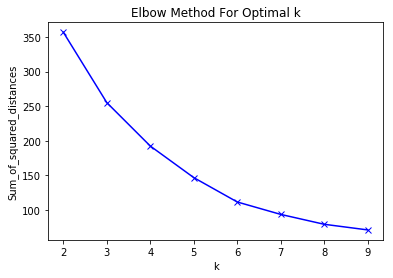

In [84]:
## Number of Cluster Analysis PCA = 3


#DECIDED ON # of Components = 3 to represent > 40% of variance
pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(x_standardized.select_dtypes(exclude='object'))
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3'])#, 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])


Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(principalDf)
    Sum_of_squared_distances.append(km.inertia_)
    cluster_labels = km.labels_
    silhouette_avg = silhouette_score(principalDf, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.21475661383963862
For n_clusters = 3 The average silhouette_score is : 0.2659514015555358
For n_clusters = 4 The average silhouette_score is : 0.2925908970924194
For n_clusters = 5 The average silhouette_score is : 0.279542846016507
For n_clusters = 6 The average silhouette_score is : 0.22788694690589442
For n_clusters = 7 The average silhouette_score is : 0.2530555024750864
For n_clusters = 8 The average silhouette_score is : 0.2551761416590848
For n_clusters = 9 The average silhouette_score is : 0.23145855793400508


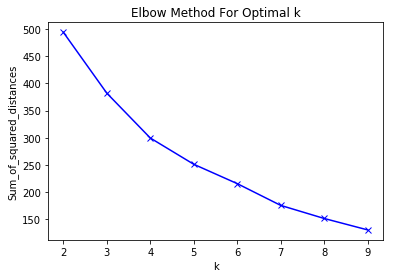

In [85]:
## Number of Cluster Analysis PCA = 4


#DECIDED ON # of Components = 4 to represent > 50% of variance
pca = PCA(n_components = 4)
principalComponents = pca.fit_transform(x_standardized.select_dtypes(exclude='object'))
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4'])#, 'principal component 5', 'principal component 6', 'principal component 7'])


Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(principalDf)
    Sum_of_squared_distances.append(km.inertia_)
    cluster_labels = km.labels_
    silhouette_avg = silhouette_score(principalDf, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.15470276970410124
For n_clusters = 3 The average silhouette_score is : 0.16464634794835226
For n_clusters = 4 The average silhouette_score is : 0.1692579269617588
For n_clusters = 5 The average silhouette_score is : 0.18978290977210374
For n_clusters = 6 The average silhouette_score is : 0.12790408593178323
For n_clusters = 7 The average silhouette_score is : 0.1530498336239779
For n_clusters = 8 The average silhouette_score is : 0.1297198444269311
For n_clusters = 9 The average silhouette_score is : 0.15820947000280994


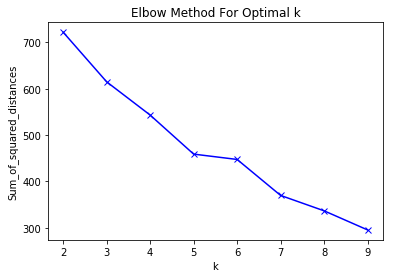

In [87]:
## Number of Cluster Analysis PCA = 7


#DECIDED ON # of Components = 7 to represent > 70% of variance
pca = PCA(n_components = 7)
principalComponents = pca.fit_transform(x_standardized.select_dtypes(exclude='object'))
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])


Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(principalDf)
    Sum_of_squared_distances.append(km.inertia_)
    cluster_labels = km.labels_
    silhouette_avg = silhouette_score(principalDf, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [106]:
##CLUSTER ANALYSIS


pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x_standardized.select_dtypes(exclude='object'))
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])#, 'principal component 3'])#, 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])

k = 4
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(principalDf)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

principalDf['Team'] = x_standardized['Team']
principalDf['Cluster'] = labels
principalDf['Playoff'] = cleaned_team_2018['Playoff']
principalDf['Tier'] = cleaned_team_2018['Tier']

principalDf

principal component 1  principal component 2                     Team  \
0                5.073783              -2.464713   Golden State Warriors*   
1                5.668585              -2.417871         Houston Rockets*   
2                1.146767              -0.741362    New Orleans Pelicans*   
3                4.163674               0.786811         Toronto Raptors*   
4                0.092233              -3.341767     Cleveland Cavaliers*   
5                0.451029              -0.368908           Denver Nuggets   
6                3.590994               2.356585      Philadelphia 76ers*   
7               -3.049769              -2.851482  Minnesota Timberwolves*   
8               -1.236276               3.585715     Los Angeles Clippers   
9               -2.078681              -1.079790        Charlotte Hornets   
10              -0.156901               3.966681       Los Angeles Lakers   
11              -1.192353              -0.627475   Oklahoma City Thunder*   
12               0.151930              -0.426239      Washington Wizards*   
13               3.016926               4.121016            Brooklyn Nets   
14              -1.621825              -0.616210         Milwaukee Bucks*   
15               1.486075               1.546672  Portland Trail Blazers*   
16              -2.269734              -2.861034          Indiana Pacers*   
17              -2.932319               0.527821          New York Knicks   
18               3.339604              -0.110559               Utah Jazz*   
19               1.994888              -0.546174          Boston Celtics*   
20              -2.453549               5.731299             Phoenix Suns   
21              -2.463576              -2.567292          Detroit Pistons   
22               1.753517               0.686031              Miami Heat*   
23              -1.214998               0.852229            Orlando Magic   
24              -2.051224              -0.097030            Atlanta Hawks   
25              -4.060154              -0.710994            Chicago Bulls   
26               0.940568              -2.091642       San Antonio Spurs*   
27               0.271721              -2.264745         Dallas Mavericks   
28              -2.446885               3.408685        Memphis Grizzlies   
29              -3.914051              -1.384259         Sacramento Kings   

    Cluster  Playoff        Tier  
0         0        1   Contender  
1         0        1   Contender  
2         3        1    Mid-Tier  
3         0        1   Contender  
4         3        1   Contender  
5         3        0    Mid-Tier  
6         0        1   Contender  
7         1        1    Mid-Tier  
8         2        0    Mid-Tier  
9         1        0  Rebuilding  
10        2        0  Rebuilding  
11        1        1    Mid-Tier  
12        3        1    Mid-Tier  
13        0        0  Rebuilding  
14        1        1    Mid-Tier  
15        3        1    Mid-Tier  
16        1        1    Mid-Tier  
17        1        0  Rebuilding  
18        0        1    Mid-Tier  
19        3        1   Contender  
20        2        0  Rebuilding  
21        1        0    Mid-Tier  
22        3        1    Mid-Tier  
23        1        0  Rebuilding  
24        1        0  Rebuilding  
25        1        0  Rebuilding  
26        3        1    Mid-Tier  
27        3        0  Rebuilding  
28        2        0  Rebuilding  
29        1        0  Rebuilding

In [107]:
#PLOT CLUSTERS

#DF creation (adding PC and cluster labels)
teams_clustered = cleaned_team_2018
teams_clustered['Cluster'] = principalDf['Cluster']
teams_clustered['PC1'] = principalDf['principal component 1']
teams_clustered['PC2'] = principalDf['principal component 2']

teams_clustered.to_csv('teams_clustered_2018.csv')

#sns.scatterplot(x="PC1", y="PC2", hue="Cluster", data=teams_clustered)

In [ ]:
## PLOT PRINCIPA COMPONENTS

plt.figure()
sns.scatterplot(x="principal component 1", y ="principal component 2", hue ="Team", data = principalDf, legend = False )
plt.figure()
sns.scatterplot(x="principal component 1", y ="principal component 3", hue ="Team", data = principalDf, legend = False )
plt.figure()
sns.scatterplot(x="principal component 2", y ="principal component 3", hue ="Team", data = principalDf, legend = False )
plt.figure()
sns.scatterplot(x="principal component 1", y ="principal component 4", hue ="Team", data = principalDf, legend = False )

plt.figure()
sns.scatterplot(x="principal component 1", y ="principal component 5", hue ="Team", data = principalDf, legend = False )





In [22]:
##SIMPLE CLUSTERING 

new = cleaned_team_2018[['Team','3PA', '3P%', 'Pct_FGA_by_dist_0-3', 'Pace', 'DRtg']]
x_new  = pd.DataFrame(StandardScaler().fit_transform(new.select_dtypes(exclude='object')),  
                               columns=['3PA', '3P%', 'Pct_FGA_by_dist_0-3', 'Pace', 'DRtg'])
                                 


For n_clusters = 2 The average silhouette_score is : 0.18795639071932815
For n_clusters = 3 The average silhouette_score is : 0.17961541384897867
For n_clusters = 4 The average silhouette_score is : 0.19247693488286843
For n_clusters = 5 The average silhouette_score is : 0.2175102810396825
For n_clusters = 6 The average silhouette_score is : 0.23199878702707902
For n_clusters = 7 The average silhouette_score is : 0.2344302704803883
For n_clusters = 8 The average silhouette_score is : 0.2330067429677256
For n_clusters = 9 The average silhouette_score is : 0.21588915562042665


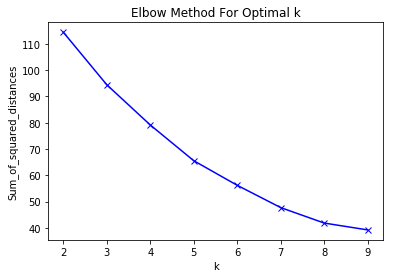

In [23]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = cluster.KMeans(n_clusters=k)
    km = km.fit(x_new)
    Sum_of_squared_distances.append(km.inertia_)
    cluster_labels = km.labels_
    silhouette_avg = silhouette_score(x_new, cluster_labels)
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [24]:
k = 5
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(x_new)

labels = kmeans.labels_

x_new['Team'] = new[['Team']]  
x_new['Cluster'] = labels
x_new['Playoff'] = cleaned_team_2018['Playoff']
x_new['Tier'] = cleaned_team_2018['Tier']

In [25]:
x_new

3PA       3P%  Pct_FGA_by_dist_0-3      Pace      DRtg  \
0  -0.179803  2.638219            -0.553852  1.365833 -0.412141   
1   3.458671  0.024038             0.288966  0.165980 -1.026258   
2  -0.485130  0.024038             0.569906  1.905768 -0.125553   
3   1.016059 -0.336538             0.409369  0.045994 -1.108140   
4   0.787064  0.925480             0.650174  0.405950  1.348328   
5   0.507181  0.835336            -0.232778 -0.313962  0.979858   
6   0.023748  0.655048            -0.353181  1.485819 -1.476611   
7  -1.604660 -0.426682            -0.674255 -0.793903  1.020799   
8  -0.637793 -0.697115             2.656885  0.825899  0.652329   
9  -0.536018  0.655048            -0.313047  0.645921  0.201976   
10 -0.256135 -1.508412             1.613396  1.785782 -0.248376   
11  0.405406 -0.697115             1.372590 -0.373954 -0.575905   
12 -0.612349  1.195913            -1.517073 -0.433947  0.038212   
13  1.550380 -0.516827            -0.473584  0.945885  0.816094   
14 -1.044895 -0.606971             1.171919 -0.673918  0.611388   
15 -0.128916  0.384615             0.088295 -0.493940 -0.903435   
16 -1.070339  0.655048             0.489637 -0.793903 -0.207435   
17 -1.451997 -0.877403            -0.112376 -0.313962  0.857035   
18  0.303630  0.384615             0.128430 -0.973881 -1.926963   
19  0.456293  1.376201            -0.874926 -0.793903 -1.926963   
20 -0.459686 -2.499998             1.292322  1.785782  1.716799   
21  0.074635  1.015624            -0.834792 -0.673918 -0.534964   
22  0.507181 -0.156250            -0.072242 -1.033874 -0.944376   
23  0.049191 -0.967547            -0.874926  0.465943  0.611388   
24  0.481737 -0.156250            -0.072242  0.585929  0.816094   
25  0.430850 -0.606971            -1.075597  0.585929  0.938917   
26 -1.095783 -0.877403            -0.794658 -1.393830 -1.558493   
27  1.143278 -0.156250            -1.597342 -1.033874  0.365741   
28 -0.510574 -0.877403             1.252188 -1.453823  0.979858   
29 -1.121227  1.195913            -1.557208 -1.453823  1.020799   

                       Team  Cluster  Playoff        Tier  
0    Golden State Warriors*        3        1   Contender  
1          Houston Rockets*        4        1   Contender  
2     New Orleans Pelicans*        0        1    Mid-Tier  
3          Toronto Raptors*        4        1   Contender  
4      Cleveland Cavaliers*        2        1   Contender  
5            Denver Nuggets        2        0    Mid-Tier  
6       Philadelphia 76ers*        4        1   Contender  
7   Minnesota Timberwolves*        1        1    Mid-Tier  
8      Los Angeles Clippers        0        0    Mid-Tier  
9         Charlotte Hornets        3        0  Rebuilding  
10       Los Angeles Lakers        0        0  Rebuilding  
11   Oklahoma City Thunder*        4        1    Mid-Tier  
12      Washington Wizards*        3        1    Mid-Tier  
13            Brooklyn Nets        2        0  Rebuilding  
14         Milwaukee Bucks*        1        1    Mid-Tier  
15  Portland Trail Blazers*        4        1    Mid-Tier  
16          Indiana Pacers*        3        1    Mid-Tier  
17          New York Knicks        1        0  Rebuilding  
18               Utah Jazz*        4        1    Mid-Tier  
19          Boston Celtics*        4        1   Contender  
20             Phoenix Suns        0        0  Rebuilding  
21          Detroit Pistons        3        0    Mid-Tier  
22              Miami Heat*        4        1    Mid-Tier  
23            Orlando Magic        2        0  Rebuilding  
24            Atlanta Hawks        2        0  Rebuilding  
25            Chicago Bulls        2        0  Rebuilding  
26       San Antonio Spurs*        4        1    Mid-Tier  
27         Dallas Mavericks        2        0  Rebuilding  
28        Memphis Grizzlies        1        0  Rebuilding  
29         Sacramento Kings        3        0  Rebuilding

In [20]:
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(x_new.select_dtypes(exclude='object'))
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])#, 'principal component 3'])#, 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7'])

k = 4
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(principalDf)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

principalDf['Team'] = cleaned_team_2018['Team']
principalDf['Cluster'] = labels
principalDf['Playoff'] = cleaned_team_2018['Playoff']
principalDf['Tier'] = cleaned_team_2018['Tier']

principalDf

principal component 1  principal component 2                     Team  \
0               -1.395686               0.517241   Golden State Warriors*   
1                0.055526               3.632249         Houston Rockets*   
2                0.564523               0.015653    New Orleans Pelicans*   
3               -0.371527               1.191737         Toronto Raptors*   
4                0.583328               0.502914     Cleveland Cavaliers*   
5               -0.053802               0.052913           Denver Nuggets   
6               -0.279204               1.365825      Philadelphia 76ers*   
7                1.005472              -1.325353  Minnesota Timberwolves*   
8                1.869084               0.158072     Los Angeles Clippers   
9                1.055415               0.853817        Charlotte Hornets   
10               1.804183               0.478455       Los Angeles Lakers   
11               0.429637               0.855261   Oklahoma City Thunder*   
12              -0.821275              -0.387966      Washington Wizards*   
13               1.168570               1.036829            Brooklyn Nets   
14               0.762875              -0.914026         Milwaukee Bucks*   
15              -1.004681               0.107459  Portland Trail Blazers*   
16              -1.238906              -1.258529          Indiana Pacers*   
17               0.355381              -2.137401          New York Knicks   
18              -1.613629               0.875024               Utah Jazz*   
19              -2.303142               0.975805          Boston Celtics*   
20               3.515973              -0.529206             Phoenix Suns   
21              -1.518860              -0.127638          Detroit Pistons   
22              -1.276852               0.044567              Miami Heat*   
23               0.832970              -0.485845            Orlando Magic   
24               0.439250              -0.188588            Atlanta Hawks   
25               0.553513              -0.557803            Chicago Bulls   
26              -0.901980              -0.650264       San Antonio Spurs*   
27              -0.818567              -0.264404         Dallas Mavericks   
28               0.328461              -1.372756        Memphis Grizzlies   
29              -1.726048              -2.464042         Sacramento Kings   

    Cluster  Playoff        Tier  
0         1        1   Contender  
1         2        1   Contender  
2         0        1    Mid-Tier  
3         1        1   Contender  
4         0        1   Contender  
5         1        0    Mid-Tier  
6         1        1   Contender  
7         3        1    Mid-Tier  
8         0        0    Mid-Tier  
9         0        0  Rebuilding  
10        0        0  Rebuilding  
11        0        1    Mid-Tier  
12        1        1    Mid-Tier  
13        0        0  Rebuilding  
14        0        1    Mid-Tier  
15        1        1    Mid-Tier  
16        3        1    Mid-Tier  
17        3        0  Rebuilding  
18        1        1    Mid-Tier  
19        1        1   Contender  
20        0        0  Rebuilding  
21        1        0    Mid-Tier  
22        1        1    Mid-Tier  
23        0        0  Rebuilding  
24        0        0  Rebuilding  
25        0        0  Rebuilding  
26        1        1    Mid-Tier  
27        1        0  Rebuilding  
28        3        0  Rebuilding  
29        3        0  Rebuilding